# Exploring the Role of Government Investment in the Development of Scientific Research and its Subsequent Effects

Sayli Dighde

Human-Centered Data Science - Final Project

University of Washington, Fall 2018


## Introduction and Background Study

Scientific Research and Development has become an increasingly important factor in the development of any nation. In any country, scientific research and technology support effective policy-making by the government, improve the quality of life of its people, strenghten the economy by improvising and streamlining business, and boost health as well as overall well being. In this project, I am exploring how the push towards research has changed around the world over the last decade. And if the greater expenditure on research and development by the government has resulted in increased high technology exports, higher publications and journal articles, more patents, more reserchers, and more industrial design applications. A positive correlation between R&D expenditure and other indicators representing scientific development will strengthen the case of growth in research not being just a random phenomenon. Although there are many social, economic, cultural, and political factors that contribute to research in any country, policy makers can be assured that more investment in R&D does indeed positively boost research and its implied economic benefits. 

According to various articles, government efforts in R&D affect the economy of a country. Specifically, they say that significant interest in understanding how innovation impacts the economy started during the 1980s. Prior to this, the general consensus in economics was that innovation just “happened” and improved the economy through technological change. Basically, government policy had little impact on long-term economic growth. Economists realized that innovation was critical for economic growth and could be shaped by public policy. Part of this realization coincided with a better understanding of human capital, or in other words, that workers could be quantified by the sum of their accumulated knowledge. And such increases in knowledge meant workers could use technologies better and more efficiently, leading to higher productivity. The United States spends the most on R&D worldwide, estimated at USD 465 billion in 2014 (from business and government). China comes in second at USD 284 billion, and Japan comes in third with USD 165 billion. However, putting that figure as a percentage of GDP provides a more telling picture. R&D expenditure as a percentage of GDP, also known as “R&D intensity,” gives a better gauge of the importance a country has placed on innovation and future growth. The more a country sets aside today for R&D, the greater the dividends they stand to reap in the future. [4], [5] So I am exploring if these assertions are indeed true using the World Development Indicators.

According to the World Bank, the Gross domestic expenditures on research and development, expressed as a percent of GDP, includes 4 main sectors:

1. Business enterprise
2. Government
3. Higher education
4. Private non-profit

The OECD's Frascati Manual defines research and experimental development as "creative work undertaken on a systemic basis in order to increase the stock of knowledge, including knowledge of man, culture and society, and the use of this stock of knowledge to devise new applications." The World Bank further clarifies R&D expenditure to fund the following:

1. Basic research - Basic research is experimental or theoretical work undertaken primarily to acquire new knowledge of the underlying foundation of phenomena and observable facts, without any particular application or use in view 
2. Applied research - Applied research is also original investigation undertaken in order to acquire new knowledge; it is, however, directed primarily towards a specific practical aim or objective. 
3. Experimental development - Experimental development is systematic work, drawing on existing knowledge gained from research and/or practical experience, which is directed to producing new materials, products or devices, to installing new processes, systems and services, or to improving substantially those already produced or installed.

World Development Indicators [6] data from 1960 till 2017 has been made publicly available and accessible by the World Bank. I collected data from the World Bank for the following indicators from 2005 till 2015: 

1. Researchers in R&D (per million people) 
2. High-technology exports (current USD)                                                        
3. Government expenditure on education, total '(% of GDP)'                                         
4. Educational attainment, Doctoral or equivalent, population 25+, total (percentage) (cumulative) 
5. Research and development expenditure (percentage of GDP)                                       
6. Patent applications, residents                                                                  
7. GDP per capita (current USD)                                                                   
8. Scientific and technical journal articles
9. High Technology Exports
10. Industrial Design Applications
11. ICT goods exports



## Research Questions

Specifically, I attempt to answer the following exploratory research questions surrounding the Research and Development Indicator:

* **RQ 1.** 10 countries with the highest and lowest Research and Development expenditure (% of GDP) in last 10 years.
* **RQ 2.** How has R&D expenditure (% of GDP) changed over the last 10 years for these countries?
* **RQ 3.** Is there a relationship between R&D expenditure and other Science and innovation indicators like researchers per million people, Scientific and technical journal articles, ICT goods and high technology exports, high-technology exports (current USD), etc.
* **RQ 4.** Do countries with higher GDP invest higher percentage of their GDP in R&D as compared to countries with lower GDP?

## Approach

Import required Libraries.

In [214]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import wbdata
import datetime

## Data

#### Getting the Data

I built a dictionary for all the features that are required for the analysis and used Wbdata to obtain data from the World Bank for select indicators for the year 2015. Most of the data is empty for the required features after 2015. Hence, 2015 is the latest year that can be analyzed upon.

According to the documentation, Wbdata is a simple python interface to find and request information from the World Bank’s various databases, either as a dictionary containing full metadata or as a pandas DataFrame. 
Currently, wbdata wraps most of the World Bank API, and also adds some convenience functions for searching and retrieving information. For ex., wbdata.get_dataframe(), wbdata.search_countries(). Documentation for wbdata can be found [here](https://wbdata.readthedocs.io/en/latest/).

I obtained data for R&D expenditure indicator for 10 years (2005 to 2015) in a Pandas DataFrame for the following indicators/features:

| Indicator Name                                             | Indicator Code   |
|--------------------------------------------------------------------------------------------|------------------|
|Researchers in R&D (per million people)                                                         | SP.POP.SCIE.RD.P6|
|High-technology exports (current USD)                                                           | TX.VAL.TECH.CD   |
|Government expenditure on education, total '(% of GDP)'                                         | SE.XPD.TOTL.GD.ZS|
|Educational attainment, Doctoral or equivalent, population 25+, total (percentage) (cumulative) | SE.TER.CUAT.DO.ZS |
|Research and development expenditure (percentage of GDP)                                        | GB.XPD.RSDV.GD.ZS |
|Patent applications, residents                                                                  | IP.PAT.RESD       |
|GDP per capita (current US$)                                                                    | NY.GDP.PCAP.CD    |
|Scientific and technical journal articles | IP.JRN.ARTC.SC |
|High Technology Exports|TX.VAL.TECH.CD|
|Industrial Design Applications| IP.IDS.RSCT|
|ICT goods exports| TX.VAL.ICTG.ZS.UN|


In [215]:
#indicator dict
indicators = {'NY.GNP.PCAP.CD': 'GDP_per_capita',
             'GB.XPD.RSDV.GD.ZS': 'R_and_D_expenditure',
             'SP.POP.SCIE.RD.P6':'researchers_per_million',
             'SE.TER.CUAT.DO.ZS': 'doctorates_percent',
             'IP.PAT.RESD': 'patent_applications',
             'IP.JRN.ARTC.SC': 'journal_articles',
             'TX.VAL.TECH.CD': 'high_technology_exports',
             'IP.IDS.RSCT': 'industrial_design_applications',
             'TX.VAL.ICTG.ZS.UN' : 'ICT goods exports'
             }
 
#load indicators of all countries into Pandas data frame
data_date = (datetime.datetime(2015, 1, 1), datetime.datetime(2015, 12, 31))
df = wbdata.get_dataframe(indicators, country="all", convert_date=False, data_date=data_date)


In [216]:
df.head()

,GDP_per_capita,ICT goods exports,R_and_D_expenditure,doctorates_percent,high_technology_exports,industrial_design_applications,journal_articles,patent_applications,researchers_per_million
country,,,,,,,,,
Arab World,7032.048094,1.037510,NaN,NaN,NaN,6351.0,41224.223984,2905.0,NaN
Caribbean small states,9680.595356,0.385380,NaN,NaN,NaN,NaN,446.700000,NaN,NaN
Central Europe and the Baltics,13197.361657,9.805803,1.151884,NaN,6.359400e+10,3917.0,89115.000000,8044.0,2142.790654
Early-demographic dividend,3351.047556,5.762436,NaN,NaN,NaN,57897.0,272830.988630,25927.0,NaN
East Asia & Pacific,9800.858463,24.033480,2.455542,NaN,NaN,656557.0,716134.222166,1403979.0,1671.121301


Now save the dataframe obtained to a CSV file.

In [219]:
print(df.shape)
df.to_csv('data/data.csv')

(264, 9)


#### Data Pre-Processing

Dropping all first 47 rows from 'Arab world' till 'world' as they represent continents or specific groups of nations and we are only interested in country-wise data.

In [220]:
df.drop(df.index[0:47], inplace = True)
df.head()

,GDP_per_capita,ICT goods exports,R_and_D_expenditure,doctorates_percent,high_technology_exports,industrial_design_applications,journal_articles,patent_applications,researchers_per_million
country,,,,,,,,,
Afghanistan,600.0,NaN,NaN,NaN,NaN,NaN,23.5,NaN,NaN
Albania,4390.0,0.792664,NaN,NaN,15123662.0,1.0,269.0,14.0,NaN
Algeria,4830.0,0.002003,NaN,NaN,2449466.0,NaN,4102.8,89.0,NaN
American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,7.4,NaN,NaN



Get the summary statistics of the data by describe method

In [223]:
df.describe()

,GDP_per_capita,ICT goods exports,R_and_D_expenditure,doctorates_percent,high_technology_exports,industrial_design_applications,journal_articles,patent_applications,researchers_per_million
count,189.000000,148.000000,74.000000,37.000000,1.390000e+02,101.000000,196.000000,109.000000,61.000000
mean,13735.343915,4.089143,1.085943,0.678206,1.476251e+10,8401.108911,11595.053571,17103.889908,2407.004459
std,18919.294033,7.849871,1.050400,0.592472,5.440988e+10,55379.885442,45748.382159,100350.161903,2094.661888
min,280.000000,0.000215,0.037240,0.000000,3.509400e+04,1.000000,0.300000,1.000000,23.255030
25%,2000.000000,0.164727,0.247525,0.279080,1.001737e+07,24.000000,32.725000,20.000000,662.095890
50%,5490.000000,0.946596,0.677185,0.586290,1.831441e+08,205.000000,268.700000,218.000000,1989.429890
75%,15310.000000,3.758226,1.465670,0.814180,3.584492e+09,1049.000000,4555.050000,1184.000000,3820.991850
max,93050.000000,48.648280,4.266320,2.900170,5.497990e+11,551481.000000,429139.000000,968252.000000,7483.576260


The count, mean, min and max rows are self-explanatory. Std gives standard deviation. The 25%, 50% and 75% rows are the corresponding percentiles.

To understand the distribution of different variables in our data, we plot a histogram for each numeric variable.

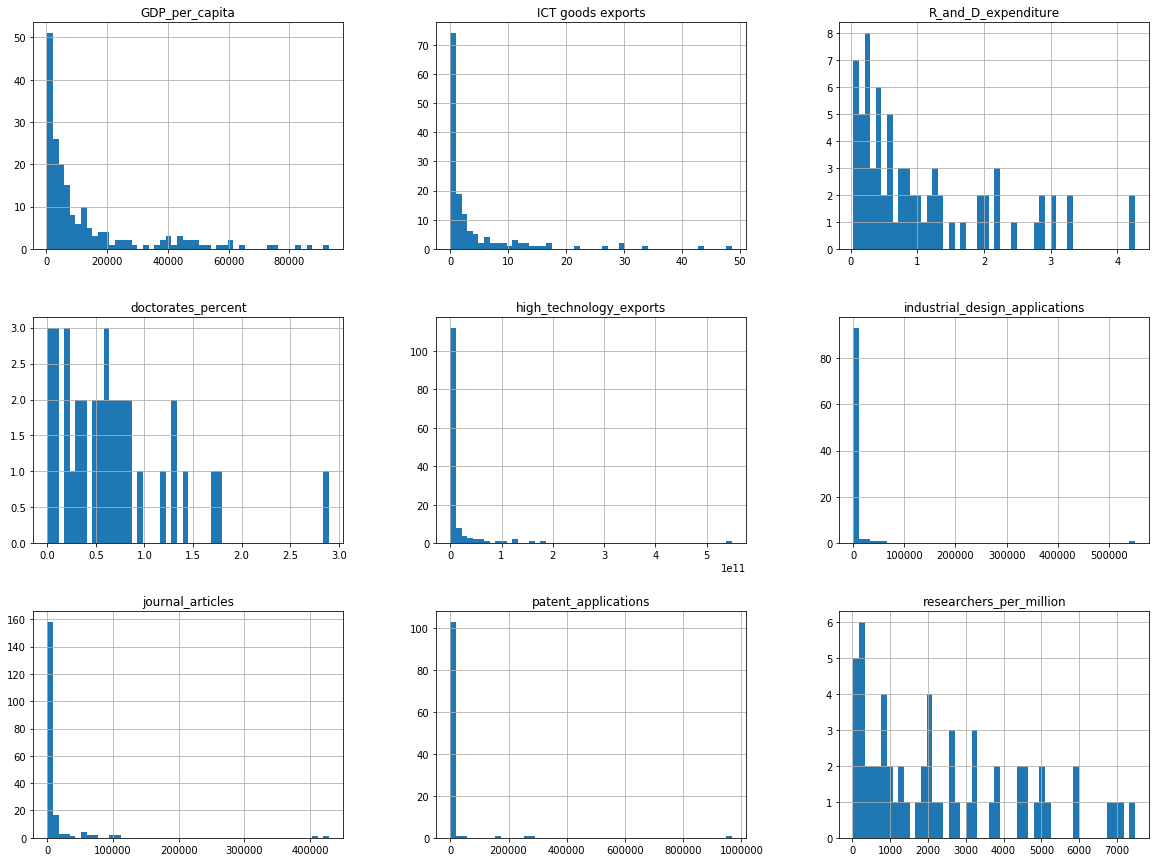

In [224]:
df.hist(bins=50, figsize=(20, 15))
plt.savefig('plots/numeric_attributes.png')
plt.show()

We see that some of the indicators have limited data points and narrower distributions.

Checked for correlation between the attributes and easily visualize any trends in the data using a sctter matrix. The diagonal represents the density plots of just respective columns of data. Other matrices indicate simple scatter plots that show the realtionships between respective variables. Used Pandas scatter_matrix function for the same.

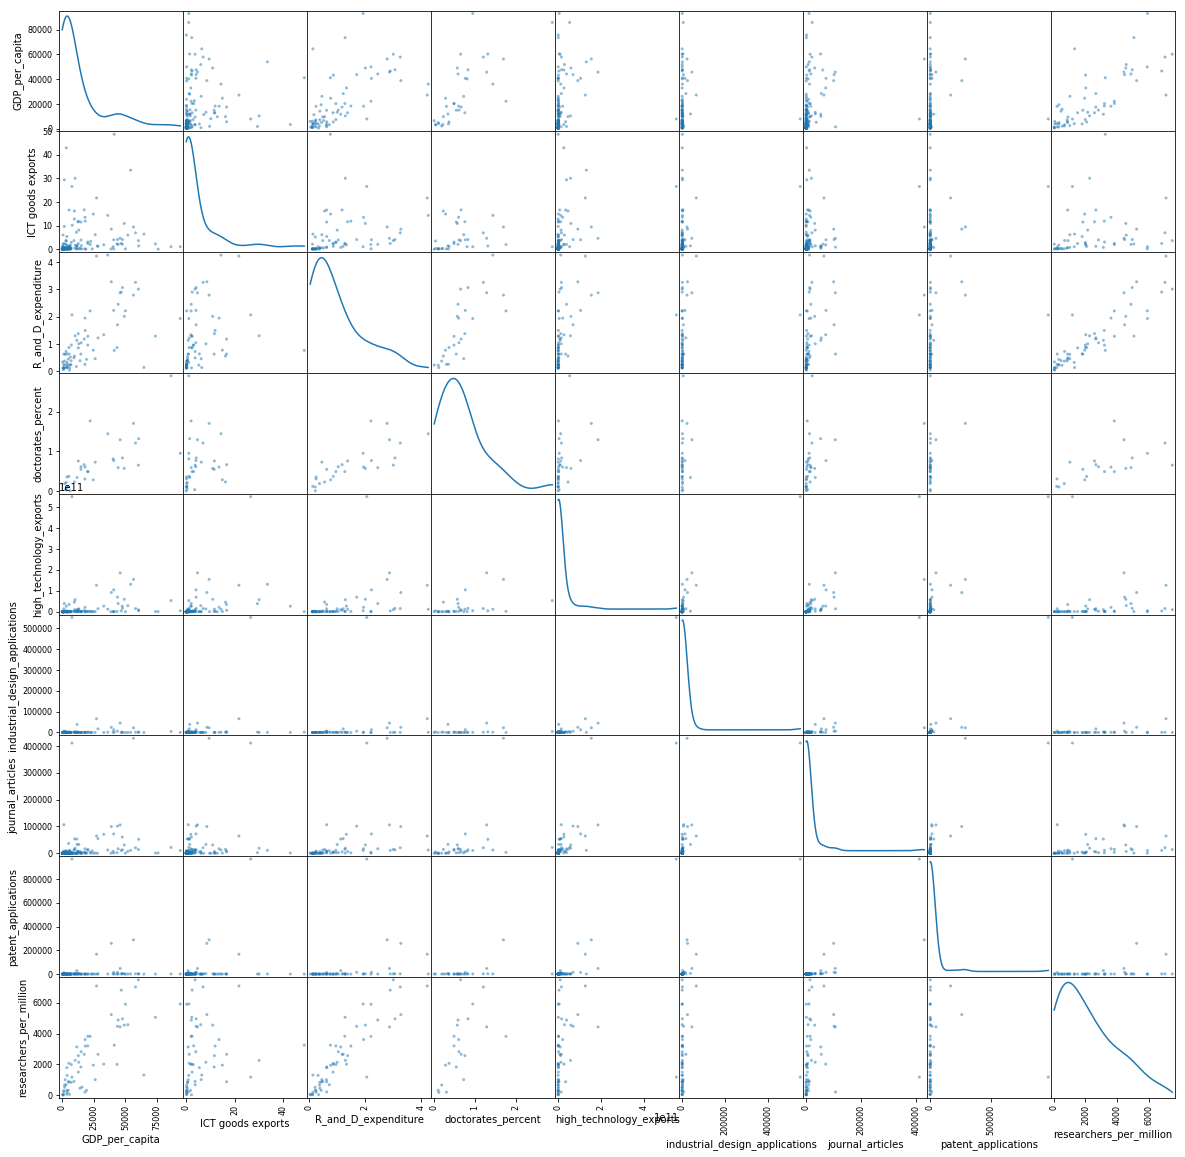

In [225]:
from pandas.plotting import scatter_matrix

attributes = list(df)
scatter_matrix(df[attributes], figsize=(20, 20), diagonal = 'kde')
plt.savefig("plots/scatter_matrix_plot.png")
plt.show()

Used the Matplotlib and Seaborn libraries to visualize the heatmap representing the correlations between the variables in varying shades of colors.

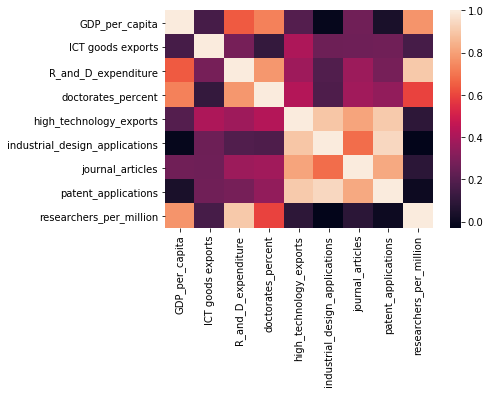

In [226]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

We can see that some of the variables are strongly correlated while some are not. In order to gain more clarity, let us get the correlation matrix giving the exact values for each of the correlations.

In [227]:
random_state = np.random.RandomState(0)
corr = df.corr()
corr.style.background_gradient()


,GDP_per_capita,ICT goods exports,R_and_D_expenditure,doctorates_percent,high_technology_exports,industrial_design_applications,journal_articles,patent_applications,researchers_per_million
GDP_per_capita,1,0.159507,0.644906,0.72678,0.197764,-0.0166251,0.264672,0.042111,0.773164
ICT goods exports,0.159507,1,0.280185,0.112971,0.410639,0.259209,0.262169,0.26465,0.160418
R_and_D_expenditure,0.644906,0.280185,1,0.779977,0.374004,0.187767,0.370369,0.280188,0.903551
doctorates_percent,0.72678,0.112971,0.779977,1,0.424765,0.181773,0.382833,0.34498,0.596453
high_technology_exports,0.197764,0.410639,0.374004,0.424765,1,0.896865,0.812103,0.909425,0.0931826
industrial_design_applications,-0.0166251,0.259209,0.187767,0.181773,0.896865,1,0.684278,0.944961,-0.0299932
journal_articles,0.264672,0.262169,0.370369,0.382833,0.812103,0.684278,1,0.824167,0.0872131
patent_applications,0.042111,0.26465,0.280188,0.34498,0.909425,0.944961,0.824167,1,0.00441642
researchers_per_million,0.773164,0.160418,0.903551,0.596453,0.0931826,-0.0299932,0.0872131,0.00441642,1




In order to deal with NANs (not a number) / missing values in the data, I replaced the missing values with the mean of respective column features.


In [228]:
df.fillna(df.mean(), inplace=True)
df.head()

,GDP_per_capita,ICT goods exports,R_and_D_expenditure,doctorates_percent,high_technology_exports,industrial_design_applications,journal_articles,patent_applications,researchers_per_million
country,,,,,,,,,
Afghanistan,600.000000,4.089143,1.085943,0.678206,1.476251e+10,8401.108911,23.500000,17103.889908,2407.004459
Albania,4390.000000,0.792664,1.085943,0.678206,1.512366e+07,1.000000,269.000000,14.000000,2407.004459
Algeria,4830.000000,0.002003,1.085943,0.678206,2.449466e+06,8401.108911,4102.800000,89.000000,2407.004459
American Samoa,13735.343915,4.089143,1.085943,0.678206,1.476251e+10,8401.108911,11595.053571,17103.889908,2407.004459
Andorra,13735.343915,4.089143,1.085943,0.678206,1.476251e+10,8401.108911,7.400000,17103.889908,2407.004459



Now let us zoom in on some of the interesting scatter-plots to better visualize the relationships specifically between R&D expenditure and the number of researchers per million.


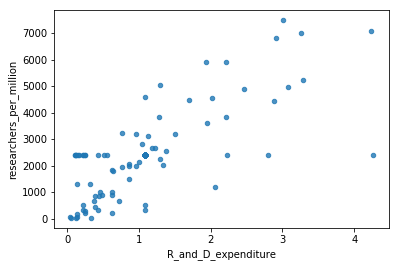

In [229]:
df.plot(kind="scatter", x="R_and_D_expenditure", y="researchers_per_million", alpha=0.8)
plt.savefig('plots/R&D_researchers_plot.png')

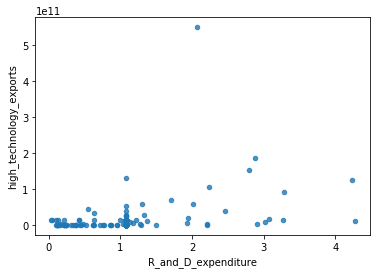

In [230]:
df.plot(kind="scatter", x="R_and_D_expenditure", y="high_technology_exports", alpha=0.8)
plt.savefig('plots/R&D_researchers_plot.png')

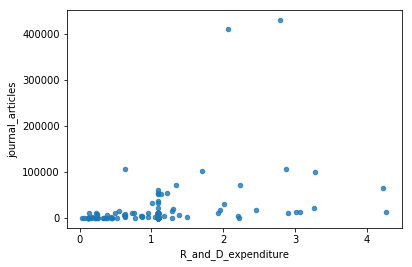

In [231]:
df.plot(kind="scatter", x="R_and_D_expenditure", y="journal_articles", alpha=0.8)
plt.savefig('plots/R&D_articles_plot.png')

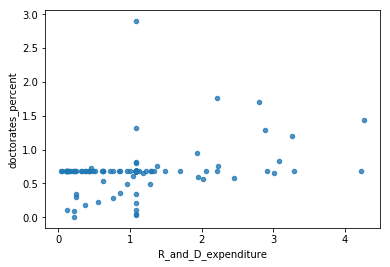

In [232]:
df.plot(kind="scatter", x="R_and_D_expenditure", y="doctorates_percent", alpha=0.8)
plt.savefig('plots/R&D_doctorates_plot.png')

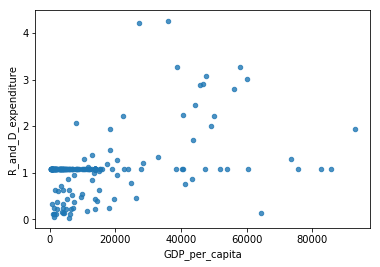

In [233]:
df.plot(kind="scatter", x="GDP_per_capita", y="R_and_D_expenditure", alpha=0.8)
plt.savefig('plots/GDP_R&D_plot.png')


#### Findings:

GDP per Capita has a positive correlation with the R&D expenditure as percentage of GDP as well as the number of researchers per million people and the percentage of doctorates in the population (0.64, 0.77, and 0.73 respectively). 

This suggests that countries with higher GDPs are spending greater percentages of their GDPs in reasearch and development. So usually, developed countries are the highest investors in R&D (% of GDP) and not the developing countries, thus perpetuating the cycle of technological inequality. So although correlation does not always imply causation, this fact hints towards sound technological and research establishments lending higher economic power to a country.

We also see that the R&D expenditure has very high correlations with the percentage of doctorates (~ 0.78) and the number of researchers per million people (~0.90). Again, this may suggest that researchers and doctorates are thriving in conducive environments created by higher investment in R&D. There are also positive correlations with other indicators like high technology exports, number of scientific and journal articles published, and the number of patent applications submitted by the residents but they aren't very strong (all less than ~0.4).

High technology exports has very strong positive correlations with the number of industrial design applications submitted, number of scientific and journal articles published, and the number of patent applications submitted by the residents (about 0.9, 0.8 and 0.9 respectively). 


Now getting the data specifically for R&D expenditure from 2005 till 2015 in a Pandas dataframe using the Wbdata API.


In [234]:
#indicator dict
indicators = {'GB.XPD.RSDV.GD.ZS': 'R_and_D_expenditure'
             }
#load indicators of all countries into Pandas data frame
data_date = (datetime.datetime(2005, 1, 1), datetime.datetime(2015, 12, 31))
df = wbdata.get_dataframe(indicators, country="all", convert_date=False, data_date=data_date)

df.to_csv('data/R_and_D_data.csv')

In [235]:
df.head(5)

R_and_D_expenditure
country    date                     
Arab World 2015                  NaN
           2014                  NaN
           2013                  NaN
           2012                  NaN
           2011             0.563807


Use the Pandas unstack function to reshape the pivoted dataframe to make it plottable.

In [236]:
dfu = df.unstack(level=0)
dfu.head()

R_and_D_expenditure                                                  \
country         Afghanistan  Albania  Algeria American Samoa Andorra Angola   
date                                                                          
2005                    NaN      NaN  0.06606            NaN     NaN    NaN   
2006                    NaN      NaN      NaN            NaN     NaN    NaN   
2007                    NaN  0.08735      NaN            NaN     NaN    NaN   
2008                    NaN  0.15421      NaN            NaN     NaN    NaN   
2009                    NaN      NaN      NaN            NaN     NaN    NaN   

                                                            ...                \
country Antigua and Barbuda Arab World Argentina  Armenia   ...    Uzbekistan   
date                                                        ...                 
2005                    NaN        NaN   0.41897  0.25794   ...       0.23776   
2006                    NaN        NaN   0.45021  0.24023   ...       0.22421   
2007                    NaN        NaN   0.45801  0.21102   ...       0.21713   
2008                    NaN        NaN   0.47041  0.22427   ...       0.19339   
2009                    NaN        NaN   0.58608  0.29109   ...       0.20305   

                                                             \
country Vanuatu Venezuela, RB Vietnam Virgin Islands (U.S.)   
date                                                          
2005        NaN           NaN     NaN                   NaN   
2006        NaN           NaN     NaN                   NaN   
2007        NaN           NaN     NaN                   NaN   
2008        NaN           NaN     NaN                   NaN   
2009        NaN           NaN     NaN                   NaN   

                                                                    
country West Bank and Gaza     World Yemen, Rep.   Zambia Zimbabwe  
date                                                                
2005                   NaN  1.972053         NaN  0.02493      NaN  
2006                   NaN  1.979951         NaN      NaN      NaN  
2007               0.20833  1.955311         NaN      NaN      NaN  
2008               0.16338  2.009292         NaN  0.27819      NaN  
2009               0.39655  2.049665         NaN      NaN      NaN  

[5 rows x 264 columns]

Now get the top 10 countries having the highest investment in Research and Development expenditure (as % of GDP) from 2005 till 2015.

In [237]:
mean_series = dfu.mean()
highest = mean_series.nlargest(10)
highest_countries = highest['R_and_D_expenditure'].keys().tolist()

In order to plot the countries using the Seaborn library, convert the Series to a Pandas dataframe.

In [238]:
df1 = pd.DataFrame({'country1':highest.index, 'val':highest.values})
df1['country'] = highest_countries
df1 = df1.drop(['country1'], axis = 1)
df1


,val,country
0,4.167476,Israel
1,3.525040,"Korea, Rep."
2,3.404698,Finland
3,3.321619,Sweden
4,3.268666,Japan
5,2.848335,Switzerland
6,2.825281,Denmark
7,2.712065,Austria
8,2.705089,United States
9,2.693082,Germany


Now plot the countries in decreasing value of average expenditure.

[Text(0,0.5,'Country'), Text(0.5,0,'R and D expenditure(% of GDP)')]

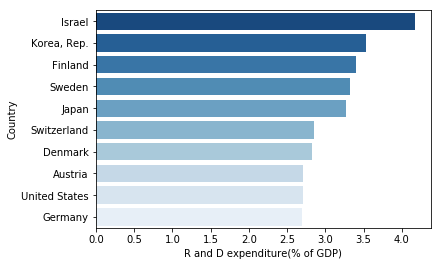

In [239]:
ax = sns.barplot(x = df1.val, y = df1.country, data = df1, palette='Blues_r')
ax.set(xlabel='R and D expenditure(% of GDP)', ylabel='Country')



Get the ten countries with the lowest mean R and D expenditure from 2005 till 2015 and plot a graph similar to the one for the top 10 countries .

In [240]:
lowest = mean_series.nsmallest(10)
lowest_countries = lowest['R_and_D_expenditure'].keys().tolist()


In [241]:
df1 = pd.DataFrame({'country1':lowest.index, 'val':lowest.values})
df1['country'] = lowest_countries
df1 = df1.drop(['country1'], axis = 1)
df1


,val,country
0,0.030503,Lesotho
1,0.037520,Monaco
2,0.038966,Iraq
3,0.050546,Guatemala
4,0.056693,"Gambia, The"
5,0.060967,Trinidad and Tobago
6,0.066060,Algeria
7,0.072610,Cabo Verde
8,0.072625,"Macao SAR, China"
9,0.075616,El Salvador


[Text(0,0.5,'Country'), Text(0.5,0,'R and D expenditure(% of GDP)')]

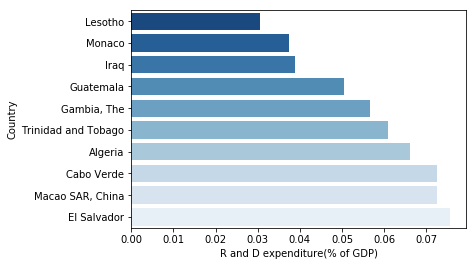

In [242]:
ax = sns.barplot(x = df1.val, y = df1.country, data = df1, palette='Blues_r')
ax.set(xlabel='R and D expenditure(% of GDP)', ylabel='Country')


Visualize the change in R&D Expenditure over the last 10 years for the top 10 countries.


Get country codes of the top 10 countries.

In [243]:
for c in highest_countries:
    wbdata.search_countries(c)
    
country_codes = ['ISR', 'KOR', 'FIN', 'SWE', 'JPN', 'CHE', 'DNK', 'AUT', 'USA', 'DEU']

ISR	Israel
KOR	Korea, Rep.
FIN	Finland
SWE	Sweden
JPN	Japan
CHE	Switzerland
DNK	Denmark
AUT	Austria
USA	United States
DEU	Germany


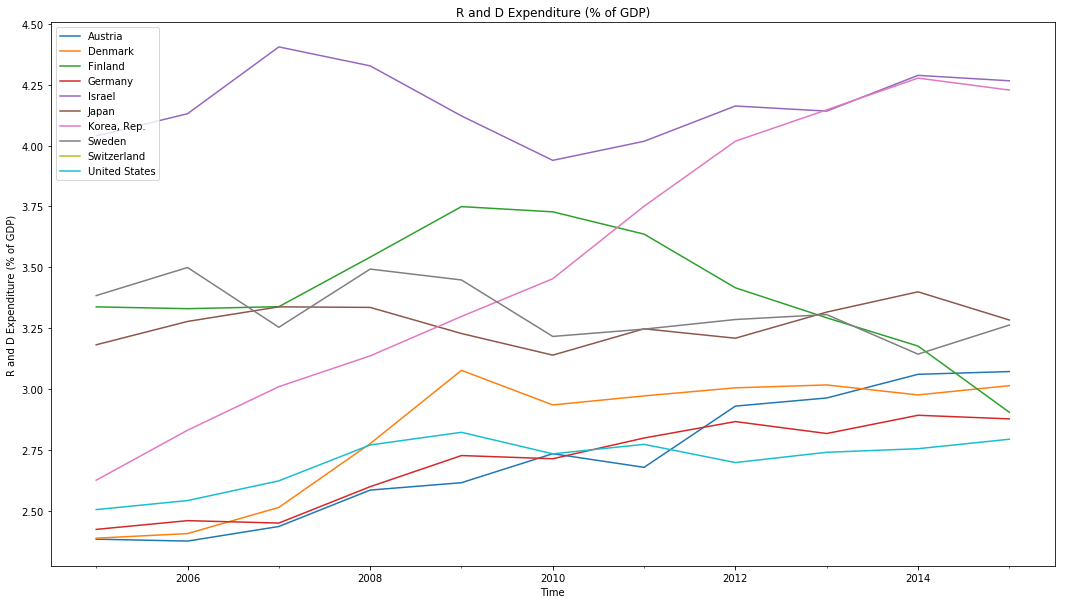

In [244]:
#df is "pivoted", pandas' unstack fucntion helps reshape it into something plottable
dfu = df.unstack(level=0)

# a simple matplotlib plot with legend, labels and a title
hdf = wbdata.get_dataframe(indicators, country = country_codes, data_date=data_date, convert_date=True)
hfu = hdf.unstack(level=0)

hfu['R_and_D_expenditure'].plot(figsize=(18,10)); 
plt.legend(loc='best'); 
plt.title("R and D Expenditure (% of GDP)"); 
plt.xlabel('Time'); 
plt.xticks();
plt.ylabel('R and D Expenditure (% of GDP)');
plt.savefig('plots/time_series_highest10.png')
plt.figure(figsize=(19,4))


Visualize the change in R&D Expenditure over the last 10 years for the bottom 10 countries.

Get country codes of the bottom 10 countries.

In [245]:
for c in lowest_countries:
    wbdata.search_countries(c)
    
country_codes = ['LSO', 'MCO', 'IRQ', 'GTM', 'GMB', 'TTO', 'DZA', 'CPV', 'MAC', 'SLV']

LSO	Lesotho
MCO	Monaco
IRQ	Iraq
GTM	Guatemala
GMB	Gambia, The
TTO	Trinidad and Tobago
DZA	Algeria
CPV	Cabo Verde
MAC	Macao SAR, China
SLV	El Salvador


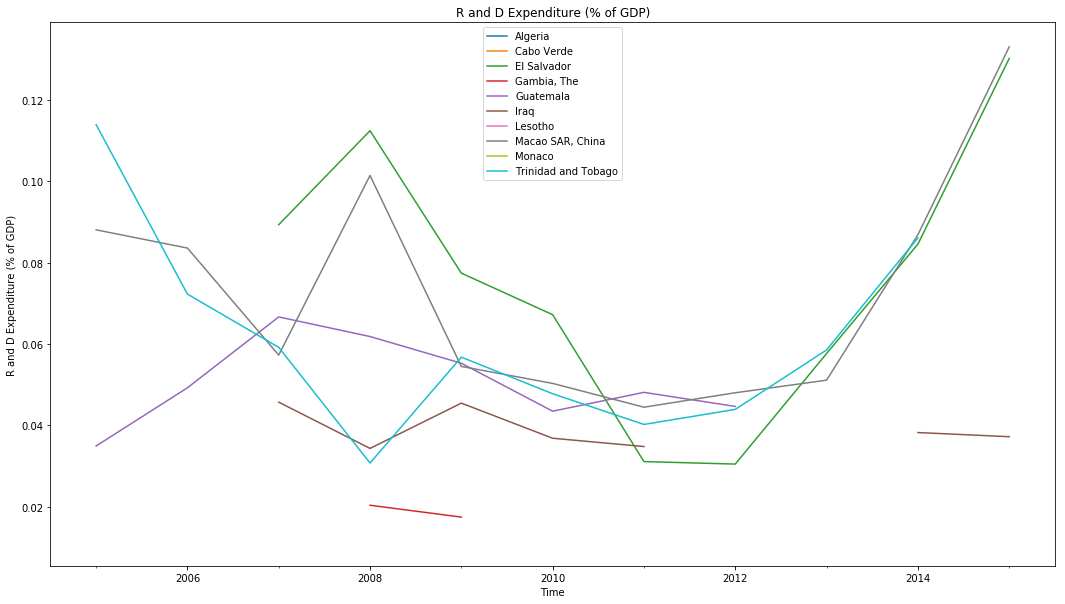

In [246]:
#df is "pivoted", pandas' unstack fucntion helps reshape it into something plottable
dfu = df.unstack(level=0)

# a simple matplotlib plot with legend, labels and a title
hdf = wbdata.get_dataframe(indicators, country = country_codes, data_date=data_date, convert_date=True)
hfu = hdf.unstack(level=0)

hfu['R_and_D_expenditure'].plot(figsize=(18,10)); 
plt.legend(loc='best'); 
plt.title("R and D Expenditure (% of GDP)"); 
plt.xlabel('Time'); 
plt.xticks();
plt.ylabel('R and D Expenditure (% of GDP)');
plt.savefig('plots/time_series_lowest10.png')
plt.figure(figsize=(19,4))

#### Findings from the above time series visualizations

From the first visualization, we see that Israel has been consistenly the top investor throughout the decade in terms of R&D as percentage of GDP. This finding is in accordance to Israel boosting of top notch researchers, institutions, patents, number of doctorates, scientific articles, and high degree of innovation as evidenced in various articles/news. [1], [2] 

Another interesting country is South Korea, showing the steepest rise in R&D expenditure over the decade. We know that although South Korea started out as an agro-based economy, it has transformed into one of the most successful economies in the world. According to an article,[3] this growth is mainly attributed to an improvement in the business environment and policies incentivizing investment in innovation. This is a prime example of how systematic government efforts in the right direction can strengthen the research environment and hence the economy of a country. South Korea achieved such economic highs inspite of limited geographical size, natural resources and population. Other developed countries like Denmark, Austria, United States, and Germany also show an overall upward trend, implying their focus on R&D. All countries in the top 10 list are extremely successful economies. So we can safely conclude that developed countries are the highest investors in R&D (% of GDP). 

In the second viz, we see that all 10 countries, with less than 0.14% GDP invested in R&D, are developing ecomonies. Iraq had a lot of internal unrest due to a war in the recent past. Then there are African countries like Gambia and Algeria as well as very small states like Monaco and Tobago. None of them have a strong economic standing. Even if the trends are more haphazard here, we can see an increase in R&D expenditure for a few of them. Overall, over the last 10 years, developed as well as developing countries are consistently increasing their R&D investment to gain competitive scientific advantage.









Now let's explore the high technology exports indicator for all the countries and see if there is an overlap between the lists obatined for this indicator with the R&D indicator lists. According to the WB, High-technology exports are products with high R&D intensity, such as in aerospace, computers, pharmaceuticals, scientific instruments, and electrical machinery. Data are in current USD. Get the data using Wbdata API for corresponding indicator as obtained during previous steps.


In [247]:

#indicator dict
indicators = {'TX.VAL.TECH.CD': 'high_technology_exports'
             }
 
#load indicators of all countries into Pandas data frame
data_date = (datetime.datetime(2005, 1, 1), datetime.datetime(2015, 12, 31))
hdf = wbdata.get_dataframe(indicators, country="all", convert_date=False, data_date=data_date)

hdf.head()
hdf.to_csv('data/exports_data.csv')

In [248]:
hdf.drop(hdf.index[0:518], inplace = True)
hdf.head()

high_technology_exports
country     date                         
Afghanistan 2014                      NaN
            2013                      NaN
            2012                      NaN
            2011                      NaN
            2010                      NaN

In [249]:
#df is "pivoted", pandas' unstack fucntion helps reshape it 
hfu = hdf.unstack(level=0)


Get the top 25 countries with the highest average high-tech exports over the last decade.

In [250]:
mean_series = hfu.mean()
highest = mean_series.nlargest(25)
highest

                         country       
high_technology_exports  China             4.071682e+11
                         United States     1.708717e+11
                         Germany           1.700652e+11
                         Singapore         1.210300e+11
                         Japan             1.142850e+11
                         Korea, Rep.       1.115729e+11
                         France            9.561338e+10
                         United Kingdom    7.075843e+10
                         Netherlands       6.372755e+10
                         Malaysia          5.846011e+10
                         Switzerland       4.380449e+10
                         Mexico            3.903904e+10
                         Belgium           3.250235e+10
                         Thailand          3.123821e+10
                         Italy             2.763589e+10
                         Canada            2.622569e+10
                         Ireland           2.589058e+10
        

Get the 25 countries with the lowest average high-tech exports over the last decade.

In [251]:
lowest = mean_series.nsmallest(25)
lowest

                         country                       
high_technology_exports  Tuvalu                              3700.000000
                         Antigua and Barbuda                12052.000000
                         Gambia, The                        15610.000000
                         Cabo Verde                         21046.333333
                         Sierra Leone                       21169.000000
                         Tonga                              38740.333333
                         Sao Tome and Principe              46424.181818
                         St. Vincent and the Grenadines     60013.888889
                         Turks and Caicos Islands           63033.142857
                         Comoros                            65664.875000
                         Solomon Islands                    75103.200000
                         Djibouti                          116611.000000
                         Iraq                              121000.00


Visualize the trends in high-tech exports over the last decade for the top 10 countries with highest R&D expenditure as well as China. China is an interesting data point here.

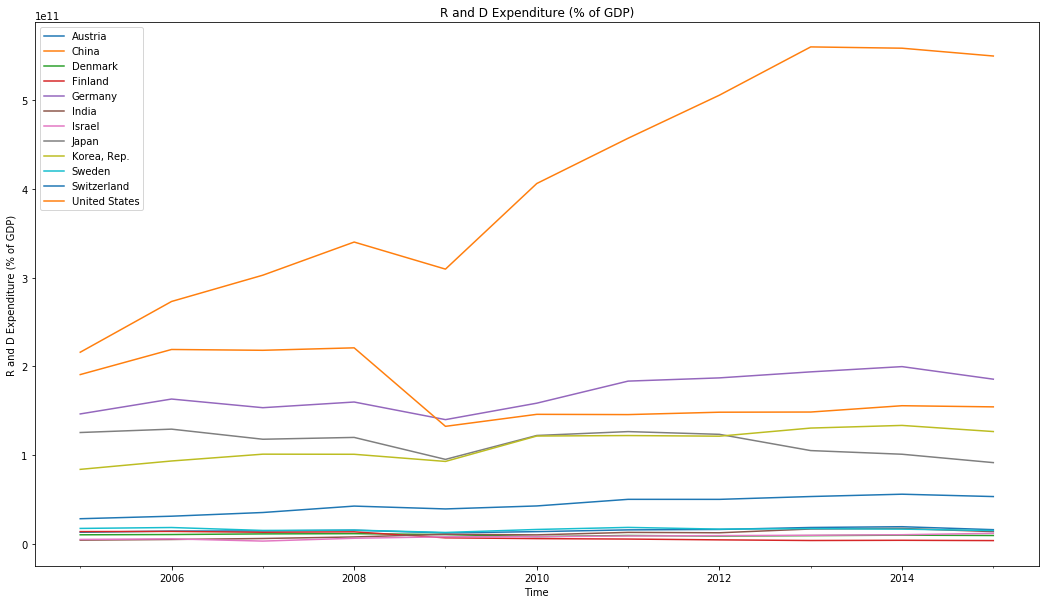

In [252]:
country_codes = ['ISR', 'KOR', 'FIN', 'SWE', 'JPN', 'CHE', 'DNK', 'AUT', 'USA', 'DEU', 'CHN', 'IND']
indicators = {'TX.VAL.TECH.CD': 'high_technology_exports'
             }

# a simple matplotlib plot with legend, labels and a title
hdf = wbdata.get_dataframe(indicators, country = country_codes, data_date=data_date, convert_date=True)
hfu = hdf.unstack(level=0)

hfu['high_technology_exports'].plot(figsize=(18,10)); 
plt.legend(loc='best'); 
plt.title("R and D Expenditure (% of GDP)"); 
plt.xlabel('Time'); 
plt.xticks();
plt.ylabel('R and D Expenditure (% of GDP)');
plt.savefig('plots/time_series_exports.png')
plt.figure(figsize=(19,4))


## Limitations

* Considering absolute investment in USD may alter findings. Although China does not rank in the top 10 list here, China’s 1.69% R&D investment is high due to higher GDP. China is the topmost country in the world for high-tech exports. According to this journal article [8], current trade statistics mistakenly credit entire values of assembled high-tech products to China, thus greatly inflating its exports. It adds that if assembly is the only source of value-added by Chinese workers, in terms of technological contribution, these assembled high-tech exports are indifferent from labor-intensive products, and so they should be excluded from the high-tech classification. So the effects of R&D indicator on so called "high-tech exports" must be taken with a grain of salt. 

* Although there is the underlying belief that R&D investment boosts economic growth, the link between R&D spending and the translation of that research into concrete outcomes remains unclear. Increase in research expenditure may not always yield economic rewards. There is also something called as "Innovation efficiency" - the ability of a country to produce high quality research in relatively less investment. For example, Austria ranks 7th overall in R&D investment, it does not rank very high in publications or high-tech exports (rank 22). 

* The investments made in R&D may not be immediately visible because of the time gap [7] between the sanction of grants and output of concrete research. 

* Scientific indicators here quantify the papers/articles published or the number of patent applications received or the high technology exports of any country. But how does one account for the unquantifiable factors like research failures, time invested in training, or simply ideas? 

* Also, R&D indicator includes grants and investments in 4 sectors and covers all kinds of basic, applied and experimental research. Hence, we cannot conduct more granular analysis on the basis of these factors. 

* We have also seen in the correlation plots that not all scientific indicators show strong positive correlations with the R&D Indicator. So this indicator must be studied in conjunction with language, legal system, culture, and other political, socio-economic and geopolitical factors.



## Conclusions

* **RQ 1.** 10 countries with the highest and lowest Research and Development expenditure (% of GDP) in last 10 years.
    * All developed and powerful economies in the top 10 list and war-torn countries/small states/developing African countries/ weak economies in the bottom 10 list.
    
* **RQ 2.** How has R&D expenditure (% of GDP) changed over the last 10 years for these countries?
    * Overall, both developed and developing countries have increased R&D expenditure to gain competitive advantage in science and technology.

* **RQ 3.** Is there a relationship between R&D expenditure and other Science and innovation indicators like researchers per million people, Scientific and technical journal articles, ICT goods and high technology exports, high-technology exports (current USD), etc.
    * The investment in R&D (as % of GDP) has strong positive correlation with some indicators like researchers per million but not with other scientific indicators like high technology exports or number of journal articles/publications. SO this indicator must be studied in conjunction with other human-centered factors.
    * Looking specifically at the case of high-technology exports as an example, we see how China ranks at the top with so many different factors affecting exports instead of just R&D expenditure.
    * There is also the need to consider innovation efficiency, unquantified research, and time gaps between grants and publications.
    * So higher R&D investment does not always guarantee proportional economic rewards.

* **RQ 4.** Do countries with higher GDP invest higher percentage of their GDP in R&D as compared to countries with lower GDP?
    * Yes, there is a positive relationship between the two indicators (~0.7) and all the countries in top 10 investor list have higher GDPs.



## References:

[1] http://www.eolasmagazine.ie/why-israel-leads-the-way-in-rd/

[2] https://www.israel21c.org/israel-among-top-10-most-powerful-innovative-countries/
    
[3] https://www.stlouisfed.org/on-the-economy/2018/march/how-south-korea-economy-develop-quickly

[4] https://www.innovationfiles.org/fueling-innovation-the-role-of-rd-in-economic-growth/

[5] https://www.sciencedirect.com/science/article/pii/S016517651000011X

[6] https://data.worldbank.org/

[7] https://www.natureindex.com/news-blog/measuring-the-impact-of-r-and-d-spending

[8] https://www.mitpressjournals.org/doi/abs/10.1162/ASEP_a_00256?journalCode=asep
